In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
pd.set_option('max_columns', 1000)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv(r"C:\Users\darre\OneDrive\Desktop\Springboard\Capstone Project One\AB_NYC_2019.csv")
df_train_o = df_train

In [3]:
#Exploring columns
print(df_train.columns.values)
print('No. variables', len(df_train.columns.values))

['id' 'name' 'host_id' 'host_name' 'neighbourhood_group' 'neighbourhood'
 'latitude' 'longitude' 'room_type' 'price'
 'calculated_host_listings_count' 'property_type' 'room_type.1'
 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'minimum_nights'
 'maximum_nights' 'number_of_reviews' 'first_review' 'last_review'
 'review_scores_rating' 'reviews_per_month' 'availability_365']
No. variables 25


In [4]:
#removing outliers in price
z = np.abs(stats.zscore(df_train.price))
print(z)
threshold = 3
print(np.where(z > 3))

[0.1733251  0.19067115 0.10641403 ... 0.04346678 0.30843464 0.0796496 ]
(array([   72,   451,   695,  1007,  1356,  1835,  2268,  2779,  2941,
        2963,  3146,  3204,  3229,  3244,  3288,  3296,  3323,  3324,
        3326,  3334,  3335,  3362,  3376,  3383,  3385,  3386,  3390,
        3394,  3716,  3946,  3947,  4089,  4987,  5309,  5412,  5725,
        5948,  6033,  6118,  6459,  6545,  6838,  6863,  6965,  7952,
        8041,  8119,  8743, 10043, 10273, 11094, 11259, 13117, 13122,
       13300, 14049, 14207, 14219, 14643, 15099, 16113, 16138, 16253,
       16742, 16996, 17567, 17595, 17743, 18022, 18270, 19782, 20246,
       20787, 21156, 21573, 22585, 23323, 23388, 24019, 24127, 24163,
       24854, 25058, 25866, 25981, 26294, 26295, 27170, 27171, 27176,
       27663, 28389, 28652, 28686, 29118, 29387, 30582, 30626, 31522,
       32589, 32831, 32841, 33037, 33358, 33460, 33554, 33625, 33778,
       33816, 34111, 34170, 34395, 34774, 34912, 35061, 35192, 35336,
       35711, 359

In [5]:
print(z[88])

0.1599428889978459


In [6]:
df_train_o = df_train_o[(z < 3)]

In [7]:
df_train.shape

(51097, 25)

In [8]:
df_train_o.shape

(50862, 25)

In [9]:
#899 entries were removed

In [10]:
df_train_o1 = df_train

Q1 = df_train_o1.quantile(0.25)
Q3 = df_train_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_train_out = df_train_o1[~((df_train_o1 < (Q1 - 1.5 * IQR)) |(df_train_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

id                                2.369383e+07
host_id                           1.270469e+08
latitude                          7.347000e-02
longitude                         4.925000e-02
price                             1.060000e+02
calculated_host_listings_count    1.000000e+00
accommodates                      2.000000e+00
bathrooms                         0.000000e+00
bedrooms                          0.000000e+00
beds                              1.000000e+00
minimum_nights                    4.000000e+00
maximum_nights                    1.097000e+03
number_of_reviews                 2.400000e+01
review_scores_rating              8.000000e+00
reviews_per_month                 1.780000e+00
availability_365                  2.300000e+02
dtype: float64


In [11]:
df_train = df_train_o
df_train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,calculated_host_listings_count,property_type,room_type.1,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753620,-73.983770,Entire home/apt,225,2,Apartment,Entire home/apt,1,1.0,0.0,1.0,7,1125,48,11/21/2009,11/4/2019,94.0,0.39,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685140,-73.959760,Entire home/apt,89,1,Guest suite,Entire home/apt,3,1.0,1.0,4.0,1,730,307,9/30/2014,2/8/2020,90.0,4.69,137
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.747670,-73.975000,Entire home/apt,200,1,Apartment,Entire home/apt,2,1.0,1.0,1.0,3,21,78,4/20/2009,10/13/2019,90.0,0.59,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.686880,-73.955960,Private room,60,1,Apartment,Private room,2,NaN,1.0,1.0,29,730,50,5/28/2009,12/2/2019,90.0,0.38,365
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.764890,-73.984930,Private room,79,1,Apartment,Private room,2,1.0,1.0,1.0,2,14,463,5/6/2009,1/28/2020,84.0,3.53,216
5,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.801780,-73.967230,Private room,79,1,Apartment,Private room,1,1.0,1.0,1.0,2,14,118,9/7/2009,7/21/2017,98.0,0.93,0
6,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.713440,-73.990370,Entire home/apt,150,4,Apartment,Entire home/apt,3,1.0,1.0,2.0,1,1125,161,9/1/2009,7/29/2019,94.0,1.27,49
7,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.760760,-73.988670,Private room,99,1,Apartment,Private room,2,1.0,1.0,1.0,2,7,210,3/12/2009,2/9/2020,97.0,1.58,10
8,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.668290,-73.987790,Private room,89,3,Townhouse,Private room,2,1.5,1.0,0.0,4,14,177,4/23/2009,1/27/2020,94.0,1.34,347
9,6021,Wonderful Guest Bedroom in Manhattan CENTRAL PARK,11528,Claudio,Manhattan,Upper West Side,40.798260,-73.961130,Private room,85,1,Apartment,Private room,1,1.0,1.0,1.0,2,730,123,5/10/2009,12/9/2019,93.0,0.94,350


In [12]:
num_missing = df_train.isnull().sum()
percent = num_missing / df_train.isnull().count()

df_missing = pd.concat([num_missing, percent], axis=1, keys=['MissingValues', 'Fraction'])
df_missing = df_missing.sort_values('Fraction', ascending=False)
df_missing[df_missing['MissingValues'] > 0]

,MissingValues,Fraction
review_scores_rating,11204,0.220282
reviews_per_month,10235,0.201231
last_review,10235,0.201231
first_review,10235,0.201231
beds,337,0.006626
bedrooms,74,0.001455
bathrooms,46,0.000904
name,17,0.000334
host_name,6,0.000118


In [13]:
#removing values with many missing values and values that have less of an impact on pricing.
variables_to_keep = df_missing[df_missing['MissingValues'] <= 337].index
df_train = df_train[variables_to_keep]
df_train.shape

(50862, 21)

In [14]:
num_missing = df_train.isnull().sum()
percent = num_missing / df_train.isnull().count()

df_missing = pd.concat([num_missing, percent], axis=1, keys=['MissingValues', 'Fraction'])
df_missing = df_missing.sort_values('Fraction', ascending=False)
df_missing[df_missing['MissingValues'] > 0]

,MissingValues,Fraction
beds,337,0.006626
bedrooms,74,0.001455
bathrooms,46,0.000904
name,17,0.000334
host_name,6,0.000118


In [15]:
#dropping rows with missing values
df_train = df_train.dropna()
df_train.shape

(50427, 21)

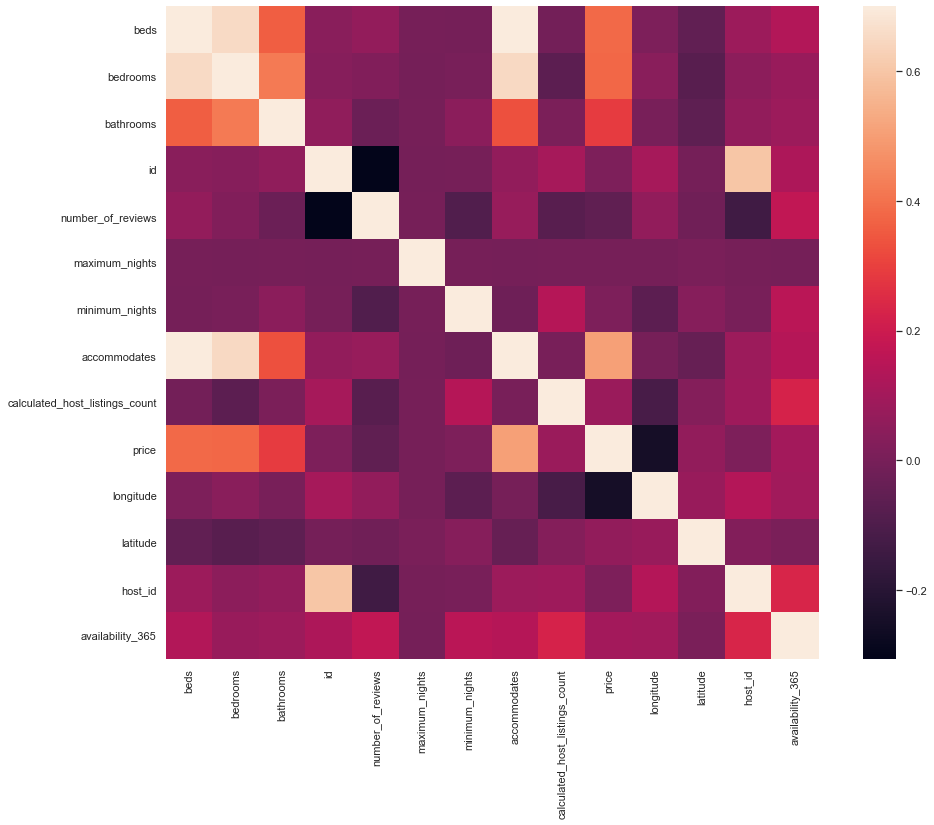

In [16]:
# Build the correlation matrix
matrix = df_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, vmax=0.7, square=True)

In [17]:
interesting_variables = matrix['price'].sort_values(ascending=False)
# Filter out the target variables (SalePrice) and variables with a low correlation score (v such that -0.1 <= v <= 0.1)
interesting_variables = interesting_variables[abs(interesting_variables) >= 0.1]
interesting_variables = interesting_variables[interesting_variables.index != 'price']
interesting_variables

accommodates    0.504230
beds            0.382300
bedrooms        0.379876
bathrooms       0.287961
longitude      -0.247817
Name: price, dtype: float64

In [18]:
#the number a list can accomodate affects the price the most among all the values.

In [19]:
values = np.sort(df_train['accommodates'].unique())
print('Unique values of "accommodates":', values)

Unique values of "accommodates": [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


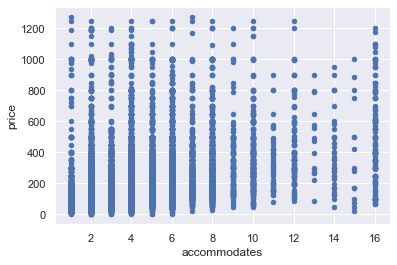

In [20]:
data = pd.concat([df_train['price'], df_train['accommodates']], axis=1)
data.plot.scatter(x='accommodates', y='price')

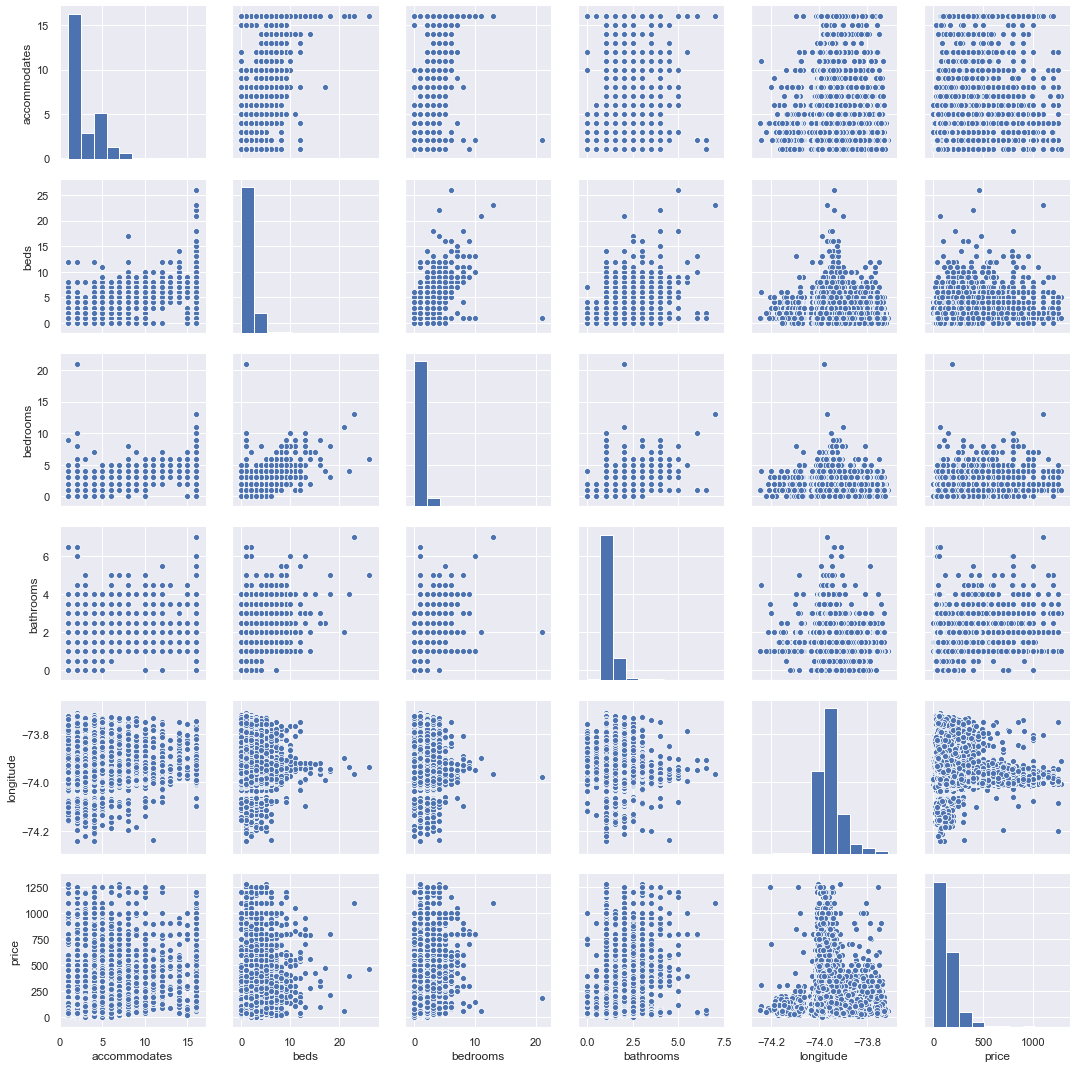

In [21]:
cols = interesting_variables.index.values.tolist() + ['price']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

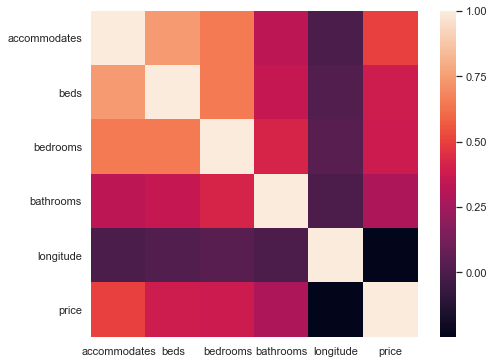

In [22]:
# Build the correlation matrix
matrix = df_train[cols].corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=1.0, square=True)

In [61]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
df_train_shuffled = shuffle(df_train)

df_train_shuffled.head(10)

y = df_train_shuffled['price']
X = df_train_shuffled.drop('name', axis = 1)
X = X.drop('price', axis = 1)
#y.head(10)
#X.head(10)
X

,beds,bedrooms,bathrooms,host_name,id,number_of_reviews,maximum_nights,minimum_nights,room_type.1,accommodates,property_type,calculated_host_listings_count,room_type,longitude,latitude,neighbourhood,neighbourhood_group,host_id,availability_365
38310,1.0,1.0,1.0,Jordon,34368927,3,1125,4,Entire home/apt,2,Apartment,1,Entire home/apt,-73.94339,40.81155,Harlem,Manhattan,20906077,0
2707,1.0,1.0,1.0,Mike,1797025,165,365,3,Entire home/apt,3,Apartment,1,Entire home/apt,-73.95147,40.67204,Crown Heights,Brooklyn,9340104,13
28889,4.0,2.0,1.0,Keren J,25255024,61,14,2,Entire home/apt,4,Guest suite,1,Entire home/apt,-73.84073,40.86681,Pelham Gardens,Bronx,159495469,67
34092,1.0,1.0,1.0,475,30399177,2,29,2,Private room,2,House,4,Private room,-73.94699,40.82391,Harlem,Manhattan,228263278,178
29123,1.0,1.0,1.0,Beata,25515856,1,1125,7,Entire home/apt,3,Apartment,1,Entire home/apt,-73.98156,40.78239,Upper West Side,Manhattan,8304377,0
8283,4.0,3.0,3.0,Nima,6969473,1,1125,7,Entire home/apt,8,Apartment,1,Entire home/apt,-73.99683,40.72039,Little Italy,Manhattan,30247261,0
42707,1.0,1.0,1.0,Daisy,37900553,17,1125,1,Private room,2,House,6,Private room,-73.95950,40.58153,Brighton Beach,Brooklyn,99296570,216
10738,2.0,2.0,1.0,Ruchi,9146175,1,1125,30,Entire home/apt,5,Apartment,49,Entire home/apt,-73.97321,40.75687,Midtown,Manhattan,2856748,365
1168,1.0,1.0,1.0,Brian,550288,16,7,4,Entire home/apt,2,Apartment,1,Entire home/apt,-73.94813,40.78024,Upper East Side,Manhattan,2684478,0
49828,1.0,1.0,1.0,Charly,41621656,1,1125,3,Entire home/apt,4,Apartment,2,Entire home/apt,-73.93760,40.71399,Williamsburg,Brooklyn,203844844,322


In [71]:
y = df_train_shuffled['price']
X = df_train_shuffled.drop('name', axis = 1)
X = X.drop('price', axis = 1)
X = X.drop('host_name', axis = 1)
X = X.drop('neighbourhood_group', axis = 1)
X = X.drop('neighbourhood', axis = 1)
X = X.drop('room_type', axis = 1)
X = X.drop('room_type.1', axis = 1)
X = X.drop('property_type', axis = 1)
##X = X.drop('first_review', axis = 1)
##X = X.drop('last_review', axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state =0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)
train_y.shape, test_y.shape, train_X.shape, test_X.shape

((37820,), (12607,), (37820, 13), (12607, 13))

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

my_pipeline_RF = make_pipeline(Imputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

my_pipeline_RF.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('imputer',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=

In [73]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))

In [74]:
evaluate_model(my_pipeline_RF, test_X, test_y)

Median Absolute Error: 27.3
RMSE: 85.69


In [75]:
evaluate_model(my_pipeline_RF, train_X, train_y)

Median Absolute Error: 9.6
RMSE: 35.23
